In [18]:
def remove_duplicates_by_word(data):
    unique_dicts = []
    words = set()

    for entity in data:
        word = entity['word']
        if word not in words:
            unique_dicts.append(entity)
            words.add(word)

    return unique_dicts

In [19]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
import json
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")


##### Process text sample (from wikipedia)

from transformers import pipeline

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

with open("../data/kaggle/les_cavernes_d_acier/chapter_1.txt.preprocessed", "r") as f:
    text = f.read()

data = nlp(text)
# Extract the desired values from each dictionary
filtered_data = [{'entity_group': d['entity_group'], 'word': d['word'], 'start': d['start'], 'end': d['end']} for d in data]
filtered_results = [
        entity for entity in filtered_data if entity["entity_group"] == "PER"
    ]
print(filtered_results)
filtered_results = remove_duplicates_by_word(filtered_results)
#print(type(filtered_results))
print(filtered_results)
# json_data = json.dumps(filtered_results, indent=4, ensure_ascii=False)


# with open('result.json', 'w') as fp:
#     fp.write(json_data)


[{'entity_group': 'PER', 'word': 'Simpson', 'start': 339, 'end': 347}, {'entity_group': 'PER', 'word': 'R. Sammy', 'start': 387, 'end': 396}, {'entity_group': 'PER', 'word': 'Vince Barrett', 'start': 483, 'end': 497}, {'entity_group': 'PER', 'word': 'R. Sammy', 'start': 688, 'end': 697}, {'entity_group': 'PER', 'word': 'Vince', 'start': 789, 'end': 795}, {'entity_group': 'PER', 'word': 'Baley', 'start': 957, 'end': 963}, {'entity_group': 'PER', 'word': 'JULIUS ENDERBY', 'start': 1188, 'end': 1203}, {'entity_group': 'PER', 'word': 'Baley', 'start': 1372, 'end': 1378}, {'entity_group': 'PER', 'word': 'Enderby', 'start': 1458, 'end': 1466}, {'entity_group': 'PER', 'word': 'Baley', 'start': 1796, 'end': 1802}]
[{'entity_group': 'PER', 'word': 'Simpson', 'start': 339, 'end': 347}, {'entity_group': 'PER', 'word': 'R. Sammy', 'start': 387, 'end': 396}, {'entity_group': 'PER', 'word': 'Vince Barrett', 'start': 483, 'end': 497}, {'entity_group': 'PER', 'word': 'Vince', 'start': 789, 'end': 795}

In [20]:
test_text = "This is a test text."
tokenized_text = tokenizer.tokenize(test_text)
print(tokenized_text)


['▁This', '▁is', '▁a', '▁test', '▁', 'text', '.']


In [21]:
def chunk_text(text):
    """
    Chunk the text into a list of subtexts of a size of 500 tokens.

    Args:
        text (str): The input text.

    Returns:
        list: A list of subtexts.
    """
    chunked_text = []
    chunk = []
    words = text.split()
    for word in words:
        if len(" ".join(chunk)) + len(word) > 500:
            chunked_text.append(" ".join(chunk))
            chunk = []
        chunk.append(word)
    if chunk:
        chunked_text.append(" ".join(chunk))
    return chunked_text


In [22]:
chunk_text(text)

['Un ruban couvert d’inscriptions serrées en langage chiffré sortait sans arrêt des organes vitaux de l’enregistreuse ; ce petit appareil recherchait et analysait ses « souvenirs », afin de fournir le renseignement demandé, qui était obtenu grâce à d’infinies vibrations produites sur la brillante surface du mercure. — Moi, reprit Simpson, je flanquerais mon pied au derrière de R. Sammy, si je n’avais pas peur de me casser une jambe ! Tu sais, l’autre soir, j’ai rencontré Vince Barrett... — Ah oui',
 '?... — Il cherche à récupérer son job, ou n’importe quelle autre place dans le Service. Pauvre gosse ! Il est désespéré ! Mais que voulais-tu que, moi, je lui dise ?... R. Sammy l’a remplacé, et fait exactement son boulot : un point c’est tout ! Et pendant ce temps-là, Vince fait marcher un tapis roulant dans une des fermes productrices de levure. Pourtant, c’était un gosse brillant, ce petit-là, et tout le monde l’aimait bien ! Baley haussa les épaules et répliqua, plus sèchement qu’il ne

In [23]:
def get_entities(text: str, keep_duplicates: bool = False):
    """
    Extracts named entities from the given text.

    Args:
        text (str): The input text.
        keep_duplicates (bool, optional): Whether to keep duplicate entities. Defaults to False.

    Returns:
        list: A list of dictionaries representing the named entities. Each dictionary contains the keys 'entity_group',
              'word', 'start', and 'end'.
    """
    tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
    model = AutoModelForTokenClassification.from_pretrained(
        "Jean-Baptiste/camembert-ner"
    )
    nlp = pipeline(
        "ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple"
    )

    raw_result = nlp(text)
    raw_result = [
        {
            "entity_group": entity["entity_group"],
            "word": entity["word"],
            "start": entity["start"],
            "end": entity["end"],
        }
        for entity in raw_result
    ]

    #Only keep the entities that are persons
    filtered_results = [
        entity for entity in raw_result if entity["entity_group"] == "PER"
    ]

    #Remove duplicates
    if keep_duplicates:
        filtered_results = remove_duplicates_by_word(filtered_results)

    return filtered_results


In [24]:
entities = get_entities(text)
print(entities)

[{'entity_group': 'PER', 'word': 'Simpson', 'start': 339, 'end': 347}, {'entity_group': 'PER', 'word': 'R. Sammy', 'start': 387, 'end': 396}, {'entity_group': 'PER', 'word': 'Vince Barrett', 'start': 483, 'end': 497}, {'entity_group': 'PER', 'word': 'R. Sammy', 'start': 688, 'end': 697}, {'entity_group': 'PER', 'word': 'Vince', 'start': 789, 'end': 795}, {'entity_group': 'PER', 'word': 'Baley', 'start': 957, 'end': 963}, {'entity_group': 'PER', 'word': 'JULIUS ENDERBY', 'start': 1188, 'end': 1203}, {'entity_group': 'PER', 'word': 'Baley', 'start': 1372, 'end': 1378}, {'entity_group': 'PER', 'word': 'Enderby', 'start': 1458, 'end': 1466}, {'entity_group': 'PER', 'word': 'Baley', 'start': 1796, 'end': 1802}]


In [25]:
def add_bio_tags(entities):
    for entity in entities:
        word = entity['word']
        bio_tag = ''
        for i, token in enumerate(word.split()):
            if i == 0:
                bio_tag += token + '<B-PER>'
            else:
                bio_tag += ' ' + token + '<I-PER>'
        entity['bio_tag'] = bio_tag
    return entities


In [26]:
add_bio_tags(entities)

[{'entity_group': 'PER',
  'word': 'Simpson',
  'start': 339,
  'end': 347,
  'bio_tag': 'Simpson<B-PER>'},
 {'entity_group': 'PER',
  'word': 'R. Sammy',
  'start': 387,
  'end': 396,
  'bio_tag': 'R.<B-PER> Sammy<I-PER>'},
 {'entity_group': 'PER',
  'word': 'Vince Barrett',
  'start': 483,
  'end': 497,
  'bio_tag': 'Vince<B-PER> Barrett<I-PER>'},
 {'entity_group': 'PER',
  'word': 'R. Sammy',
  'start': 688,
  'end': 697,
  'bio_tag': 'R.<B-PER> Sammy<I-PER>'},
 {'entity_group': 'PER',
  'word': 'Vince',
  'start': 789,
  'end': 795,
  'bio_tag': 'Vince<B-PER>'},
 {'entity_group': 'PER',
  'word': 'Baley',
  'start': 957,
  'end': 963,
  'bio_tag': 'Baley<B-PER>'},
 {'entity_group': 'PER',
  'word': 'JULIUS ENDERBY',
  'start': 1188,
  'end': 1203,
  'bio_tag': 'JULIUS<B-PER> ENDERBY<I-PER>'},
 {'entity_group': 'PER',
  'word': 'Baley',
  'start': 1372,
  'end': 1378,
  'bio_tag': 'Baley<B-PER>'},
 {'entity_group': 'PER',
  'word': 'Enderby',
  'start': 1458,
  'end': 1466,
  'bio_t

In [27]:
def tag_text(text: str, entities: list):
    """
    Tags the text with BIO tags based on the given entities.

    Args:
        text (str): The input text.
        entities (list): A list of dictionaries representing the named entities. Each dictionary contains the keys 'entity_group',
                          'word', 'start', 'end', and 'bio_tag'.

    Returns:
        str: The tagged text.
    """
    tagged_text = ''
    start = 0
    for entity in entities:
        tagged_text += text[start:entity['start'] + 1] + entity['bio_tag']
        start = entity['end'] + 1
    tagged_text += text[start:]
    return tagged_text

In [28]:
tag_text(text, entities)

'     Un ruban couvert d’inscriptions serrées en langage chiffré\nsortait sans arrêt des organes vitaux de l’enregistreuse ; ce petit\nappareil recherchait et analysait ses « souvenirs », afin de\nfournir le renseignement demandé, qui était obtenu grâce à\nd’infinies vibrations produites sur la brillante surface du\nmercure.\n     — Moi, reprit Simpson<B-PER> je flanquerais mon pied au derrière\nde R.<B-PER> Sammy<I-PER> si je n’avais pas peur de me casser une jambe ! Tu\nsais, l’autre soir, j’ai rencontré Vince<B-PER> Barrett<I-PER>..\n     — Ah oui ?...\n     — Il cherche à récupérer son job, ou n’importe quelle autre\nplace dans le Service. Pauvre gosse ! Il est désespéré ! Mais que\nvoulais-tu que, moi, je lui dise ?... R.<B-PER> Sammy<I-PER>l’a remplacé, et fait\nexactement son boulot : un point c’est tout ! Et pendant ce\ntemps-là, Vince<B-PER>fait marcher un tapis roulant dans une des\nfermes productrices de levure. Pourtant, c’était un gosse\nbrillant, ce petit-là, et tout le m

In [29]:
def tag_file(input_file_path: str):
    """
    Tags the text in the given file with BIO tags.

    Args:
        input_file_path (str): The path to the input file.

    Returns:
        str: The tagged text.
    """
    with open(input_file_path, 'r') as f:
        text = f.read()

    chunks = chunk_text(text)
    tagged_chunks = []
    for chunk in chunks:
        entities = add_bio_tags(get_entities(chunk))
        tagged_chunks.append(tag_text(chunk, entities))
    return ' '.join(tagged_chunks)

In [30]:
tag_file("../data/kaggle/les_cavernes_d_acier/chapter_1.txt.preprocessed")

'Un ruban couvert d’inscriptions serrées en langage chiffré sortait sans arrêt des organes vitaux de l’enregistreuse ; ce petit appareil recherchait et analysait ses « souvenirs », afin de fournir le renseignement demandé, qui était obtenu grâce à d’infinies vibrations produites sur la brillante surface du mercure. — Moi, reprit Simpson<B-PER> je flanquerais mon pied au derrière de R.<B-PER> Sammy<I-PER> si je n’avais pas peur de me casser une jambe ! Tu sais, l’autre soir, j’ai rencontré Vince<B-PER> Barrett<I-PER>.. — Ah oui ?... — Il cherche à récupérer son job, ou n’importe quelle autre place dans le Service. Pauvre gosse ! Il est désespéré ! Mais que voulais-tu que, moi, je lui dise ?... R.<B-PER> Sammy<I-PER>l’a remplacé, et fait exactement son boulot : un point c’est tout ! Et pendant ce temps-là, Vince<B-PER>fait marcher un tapis roulant dans une des fermes productrices de levure. Pourtant, c’était un gosse brillant, ce petit-là, et tout le monde l’aimait bien ! Baley<B-PER>hau

In [31]:
def write_bio_tag_file(input_file_path: str, output_file_path: str):
    """
    Tags the text in the given file with BIO tags and writes the tagged text to the output file.

    Args:
        input_file_path (str): The path to the input file.
        output_file_path (str): The path to the output file.
    """
    tagged_text = tag_file(input_file_path)
    with open(output_file_path, "w") as f:
        f.write(tagged_text)

In [70]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [67]:
model = SequenceTagger.load("qanastek/pos-french")

with open("test.txt", 'r') as f:
    text = f.read()

sentence = Sentence(text)

# Predict tags
model.predict(sentence)

with open("test" + "_pos.txt", 'w') as file:
    tokens = [token.text for token in sentence.tokens]
    pos_tags = [token.labels[0].value for token in sentence.tokens]

    # Concatenate tokens and POS tags
    result = " ".join([f"{token} <{pos_tag}>" for token, pos_tag in zip(tokens, pos_tags)])

    file.write(result)

2023-11-11 12:48:27,015 SequenceTagger predicts: Dictionary with 69 tags: <unk>, O, DET, NFP, ADJFP, AUX, VPPMS, ADV, PREP, PDEMMS, NMS, COSUB, PINDMS, PPOBJMS, VERB, DETFS, NFS, YPFOR, VPPFS, PUNCT, DETMS, PROPN, ADJMS, PPER3FS, ADJFS, COCO, NMP, PREL, PPER1S, ADJMP, VPPMP, DINTMS, PPER3MS, PPER3MP, PREF, ADJ, DINTFS, CHIF, XFAMIL, PRELFS, SYM, NOUN, MOTINC, PINDFS, PPOBJMP, NUM, PREFP, PDEMFS, VPPFP, PPER3FP


In [68]:
def write_POS_tag_file(input_file_path: str, output_file_path: str):
    """
    Tags the text in the given file with BIO tags and writes the tagged text to the output file.

    Args:
        input_file_path (str): The path to the input file.
        output_file_path (str): The path to the output file.
    """
    with open(input_file_path, 'r') as f:
        text = f.read()

    model = SequenceTagger.load("qanastek/pos-french")
    sentence = Sentence(text)
    model.predict(sentence)

    with open(output_file_path, 'w') as file:
        tokens = [token.text for token in sentence.tokens]
        pos_tags = [token.labels[0].value for token in sentence.tokens]

        result = " ".join([f"{token} <{pos_tag}>" for token, pos_tag in zip(tokens, pos_tags)])

        file.write(result)


In [69]:
write_POS_tag_file("test.txt", "test_POS.txt")

2023-11-11 12:49:48,528 SequenceTagger predicts: Dictionary with 69 tags: <unk>, O, DET, NFP, ADJFP, AUX, VPPMS, ADV, PREP, PDEMMS, NMS, COSUB, PINDMS, PPOBJMS, VERB, DETFS, NFS, YPFOR, VPPFS, PUNCT, DETMS, PROPN, ADJMS, PPER3FS, ADJFS, COCO, NMP, PREL, PPER1S, ADJMP, VPPMP, DINTMS, PPER3MS, PPER3MP, PREF, ADJ, DINTFS, CHIF, XFAMIL, PRELFS, SYM, NOUN, MOTINC, PINDFS, PPOBJMP, NUM, PREFP, PDEMFS, VPPFP, PPER3FP


In [ ]:
write_bio_tag_file("../data/kaggle/les_cavernes_d_acier/chapter_1.txt.preprocessed", "../data/kaggle/les_cavernes_d_acier/chapter_1.txt.preprocessed.tagged")

In [ ]:
from transformers import CamembertModel, CamembertTokenizer
import torch

# Load pre-trained Camembert model and tokenizer
model_name = 'camembert-base'
tokenizer = CamembertTokenizer.from_pretrained(model_name)
model = CamembertModel.from_pretrained(model_name)

# Assuming 'names' is your list of French strings
names = ['list', 'of', 'your', 'French', 'names']

# Convert names into tokens
tokens = tokenizer(names, return_tensors='pt', padding=True, truncation=True)

# Get embeddings from Camembert
with torch.no_grad():
    embeddings = model(**tokens).last_hidden_state.mean(dim=1)  # Mean pooling over the tokens

# Convert embeddings to a numpy array
embeddings_array = embeddings.numpy()


In [ ]:
print(embeddings_array)

[[ 2.5457520e-02  1.9502008e-01  9.5946267e-02 ... -1.2614131e-03
  -3.4861069e-02 -6.1775614e-02]
 [ 4.9295358e-02  2.4522889e-01  2.7901208e-02 ... -3.3852983e-02
   3.2870568e-02 -1.9953772e-04]
 [ 1.3908811e-01  3.6588863e-01 -9.9164292e-02 ...  1.7919924e-02
   3.4764811e-02 -5.3519718e-02]
 [ 9.0838090e-02  1.5609087e-01  8.5225694e-02 ...  1.2635261e-02
   7.5460272e-03 -9.1026828e-02]
 [ 2.5424529e-02  2.3475938e-01  6.8598837e-03 ... -5.7950355e-03
   5.2910518e-02  4.4839092e-02]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings_array, embeddings_array)


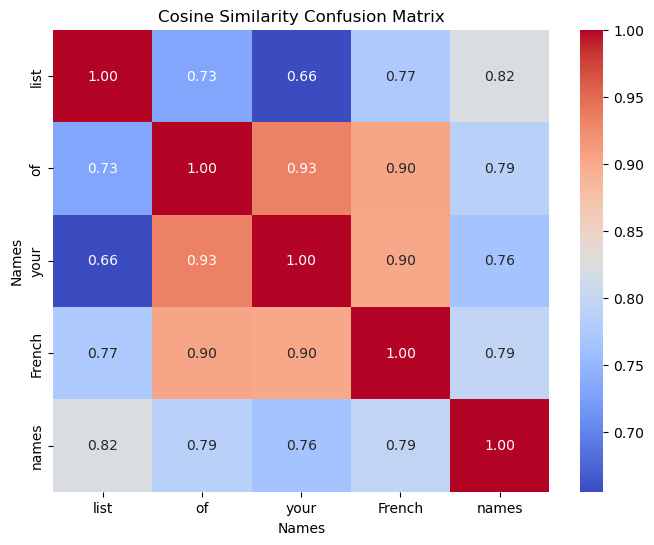

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming similarity_matrix is your cosine similarity matrix
# You can replace it with the actual similarity matrix you have

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=names, yticklabels=names)
plt.title('Cosine Similarity Confusion Matrix')
plt.xlabel('Names')
plt.ylabel('Names')
plt.show()
